# Part 2 Regression

## Table of Contents
- Simple Linear Regression: y=b0+b1*x
- Multiple Linear Regression: y = b0 + b1*x1 + ... + bn*xn
- Polynomial Regression
- Support Vector for Regression (SVR)
- Decision Tree Classification
- Random Forest Classification

In [3]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

%matplotlib inline
plt.rcParams['figure.dpi'] = 150

### 1. Simple Linear Regression


### $$y = b_0 + b_1*x$$


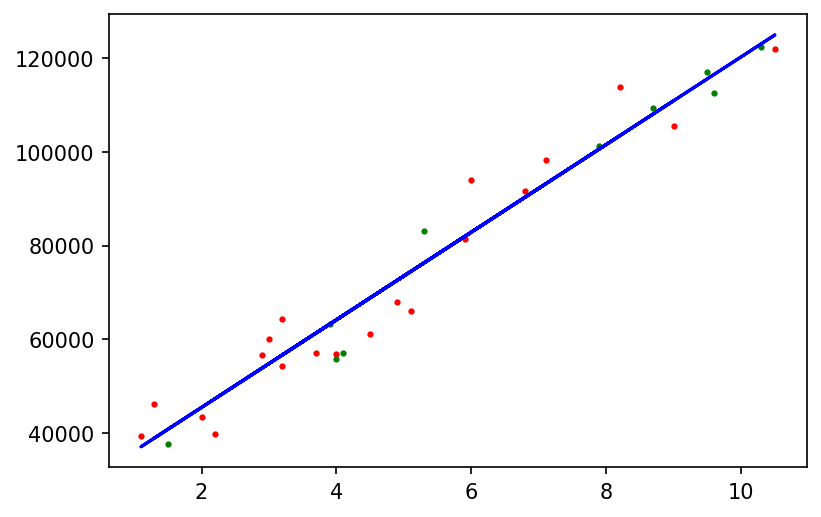

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Importing the dataset
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[: , :-1].values
y = dataset.iloc[: , -1].values

# Splitting the dataset into Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3,
                                                    random_state = 0)

# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Visialize training, test and predicted line (prediction line won't change for test data.)
plt.scatter(X_train, y_train, color='red', s=4) 
plt.scatter(X_test, y_test, color='green', s=4)
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.show()

### 2. Multiple Linear Regression

### $$y = b_0 + b_1*x_1 + ... + b_n*x_n$$

In [25]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

# Encoding categorical data
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

# Avoiding the Dummy Variable Trap
X = X[:, 1:]

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Building the optimal model using Backward Elimination
X = np.append(arr=np.ones((50, 1)).astype(int), values=X, axis=1)
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
# regressor_OLS.summary() sequence of eliminating of everything with significance level > 5%
# also remove dummy variables
X_opt = X[:, [0, 1, 3, 4, 5]]
# regressor_OLS.summary()
X_opt = X[:, [0, 1, 3, 4, 5]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()
X_opt = X[:, [0, 3, 4, 5]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()
X_opt = X[:, [0, 3, 5]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()
X_opt = X[:, [0, 3]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()
# At the end RND spends is the most powerful predictor of profit

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 17 Mar 2019   Prob (F-statistic):           3.50e-32
Time:                        20:13:09   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3. Polynomial Linear Regression
###  $$y = b_0 + b_1x_1 + b_2x_1^2 + ... + b_nx_1^n$$

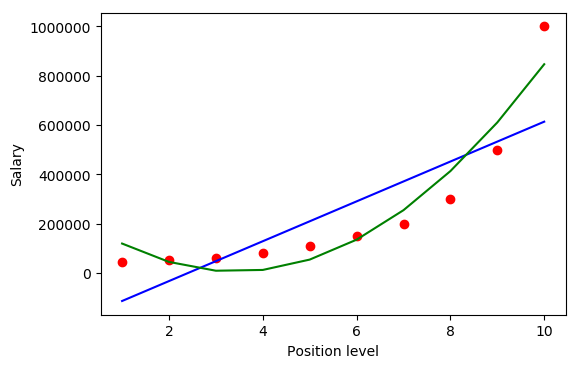

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# prepare dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

# build simple linear regressor that in its turn is polinom of 1st degree (for comparison)
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# build regressor level 2 (may change)
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)  # todo: what the diff and when use fit or fit_transform?
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

# Visualize linear (polinom degree 1) and any other
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color='green')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### 4. Support Vector for Regression (SVR)

[170370.0204065]


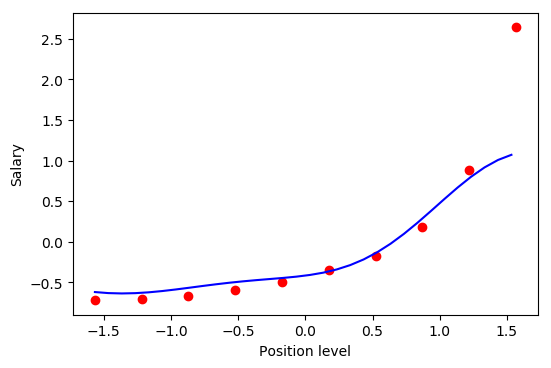

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# Importing dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2:].values

# Feature scalling
sc_X, sc_y = StandardScaler(), StandardScaler()
X, y = sc_X.fit_transform(X), sc_y.fit_transform(y)

# Creating a regressor
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

# Making prediction for one specific value that is Level 6.5 that is normalized.
value = np.array([[6.5]])  # adding to [[]] is easier way to reshape value into matrix
#  inverse trasformation needed to make backward transformation cause it's normilized
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(value)))
print(y_pred)

# Just to make plot smooth by in some way interpolation. Generate numbers in between X and fit regressor to them.
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

# Building a plot
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### 5. Decision Tree Classification

[150000.]


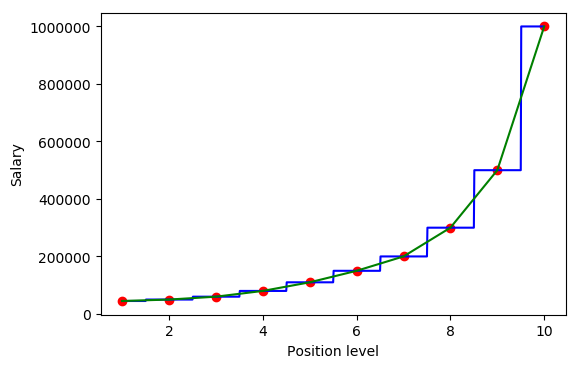

In [28]:
from sklearn.tree import DecisionTreeRegressor


#  Preparing dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2:].values

# Building regressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, y)

# Non related to plot prediction on one particular value
y_pred = regressor.predict([[6.5]])
print(y_pred)

# Same trick to make plot smother
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)

# Building a plot
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
"""
reason why to increase detalization. If do not do that - plot would simply join all averages for each tree
and cause number of trees equal to numbers of periods average for that period would be exactly our value.
Something like that
"""
plt.plot(X, regressor.predict(X), color='green')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### 6. Random Forest Classification

Random forest is combination of particular number of trees. That work the same returning some average value across all the trees but what makes it's good is that it kind of more resistance to errors. The more trees in a forest that more periods would be

[160333.33333333]


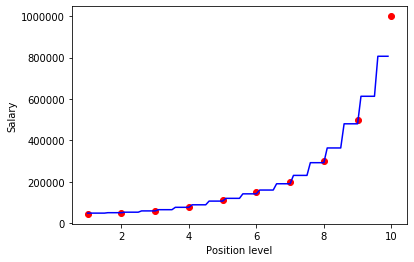

In [4]:
from sklearn.ensemble import RandomForestRegressor


dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values


regressor = RandomForestRegressor(n_estimators=300, random_state=0)
regressor.fit(X, y)

y_predict = regressor.predict([[6.5]])
print(y_predict)

X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)

plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()